<a href="https://colab.research.google.com/github/242028904/CEE2/blob/main/15_graficos_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Gráficos -  Seaborn**

`Seaborn` é uma biblioteca para visualização de dados em Python, construída sobre o `Matplotlib`.
* Focada em gráficos estatísticos.
* Suporte integrado para DataFrames do Pandas.

O tutorial oficial dessa biblioteca pode ser acessado em [tutorial_link](https://seaborn.pydata.org/tutorial/introduction).

---
**Instalação**

```bash
!pip install seaborn
```

---
**Importação**

Geralmente importamos como `sns`.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

---
**Personalizações**

Principais argumentos das funções que geram gráficos:

* `hue`: Adiciona cores para categorizar. Aceita variáveis categóricas ou numéricas.
  * **Categórica:**  cada categoria é representada por uma cor distinta.
  * **Numéricas:** Se a variável for contínua, o Seaborn cria um mapa de cores (gradiente), que pode ser personalizado utilizando o argumento `palette`.

* `style`: Diferencia categorias com símbolos, funciona como um complemento a `hue`. Aceita variáveis categóricas.
  * **Categórica:**  cada categoria é representada por um marcador diferente, por exemplo: círculo, triângulo, quadrado.

* `size`: Ajusta o tamanho dos pontos. Aceita variáveis numéricas e categóricas:

  * **Numéricas:**  o tamanho dos marcadores será proporcional aos valores.
  * **Categórica:**  categorias diferentes são associadas a tamanhos distintos.


---
**Dataset Exemplo**

Nos exemplos a seguir, vamos usar o dataset `tips` (gorgetas).

> Esse dataset já faz parte da biblioteca.

*Estrutura do Dataset* `tips`:

* `total_bill`: Valor total da conta.
* `tip`: Gorjeta.
* `sex`: Gênero do cliente.
* `smoker`: Fumante ou não.
* `day`: Dia da semana.
* `time`: Refeição (Almoço ou Jantar).
* `size`: Número de pessoas na mesa

In [3]:
# Carregando o dataset de gorjetas
df = sns.load_dataset("tips")

print("df:\n", df.head())

print("\ndtypes:\n", df.dtypes)

df:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

dtypes:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


---
## Gráfico de Dispersão (Scatter Plot)

Para este tipo de gráficos temos a seguinte função:
```python
sns.scatterplot(data, x, y, hue, style, size)
```


Veja os exemplos:

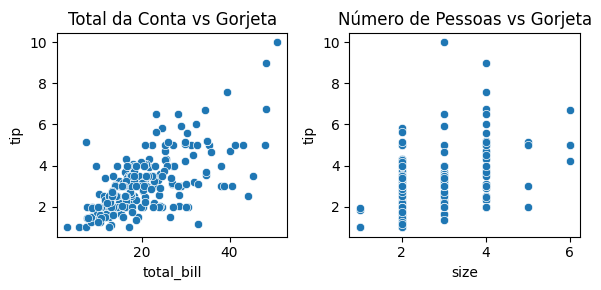

In [4]:
plt.figure(figsize=(6, 3))

# gráfico padrão
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Total da Conta vs Gorjeta")

# gráfico padrão
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="size", y="tip")
plt.title("Número de Pessoas vs Gorjeta")

# Ajustando o layout
plt.tight_layout() ## evita que as figuras fiquem sobrepostas

plt.show()

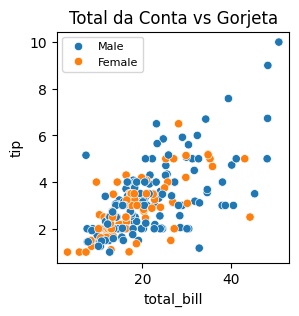

In [5]:
plt.figure(figsize=(3, 3))

# adicionando diferentes cores de acordo com a variável "sex"
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Total da Conta vs Gorjeta")
plt.legend(loc="upper left", fontsize=8)
plt.show()

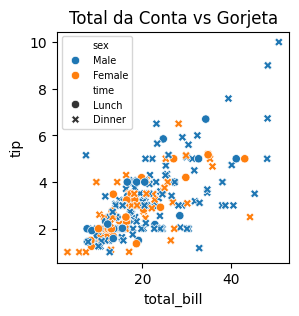

In [6]:
plt.figure(figsize=(3, 3))

# adicionando diferentes cores de acordo com a variável "sex"
# adicionando diferentes pontos de acordo com a variável "time"
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", style="time")
plt.title("Total da Conta vs Gorjeta")
plt.legend(loc="upper left", fontsize=7)
plt.show()

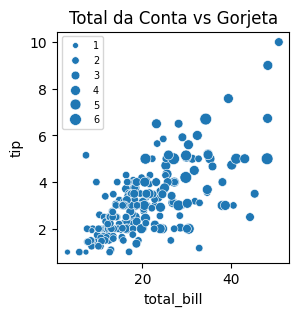

In [7]:
plt.figure(figsize=(3, 3))

# alterando o tamanho dos pontos de acordo com a variável "size" (número de pessoas na mesa)
sns.scatterplot(data=df, x="total_bill", y="tip", size = "size")
plt.title("Total da Conta vs Gorjeta")
plt.legend(fontsize=7)
plt.show()

**DICA:**

> A legenda pode ser movida para fora do gráfico utilizando o argumento `bbox_to_anchor(x,y)`. Neste caso, o argumento `loc` vai marcar o ponto de referência para as coordenadas "x" , "y".

Veja o exemplo:

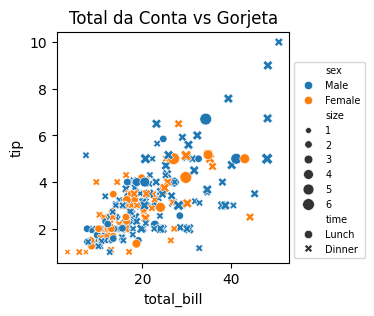

In [8]:
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", style="time", size="size")
plt.title("Total da Conta vs Gorjeta")
plt.legend(loc='lower left', bbox_to_anchor=(1, 0), fontsize=7)
plt.show()

---
## Gráfico de Barras

O `sns.barplot` do Seaborn é resumidor por padrão: ele agrega os dados automaticamente.

O comportamento padrão é:
> Para cada categoria em x, calcular a média da variável em y.
> Também apresenta um intervalo com 95% de confiança para a média. Este intervalo é construido utilizando 1000 amostras de bootstrap.

```python
sns.barplot(data, x, y, hue, errorbar=('ci', 95))
```

* `hue` (opcional): define cores;
* `errorbar` (opcional): defini o tamanho do intervalo de confiança. Use `errorbar=None` para não apresentar.

> Caso queira utilizar um agregador diferente da média, pode-se utilizar o argumento `estimador`, por exemplo: para SOMA use `estimator=np.sum`, para MEDIANA use `estimator=np.median`.

Veja os exemplos:

In [ ]:
plt.figure(figsize=(3, 3))
sns.barplot(data=df, x="day", y="total_bill")
plt.title("Média do Total da Conta por Dia e Gênero")
plt.show()

In [ ]:
plt.figure(figsize=(3, 3))
## separando cores pela variável "sex"
sns.barplot(data=df, x="day", y="total_bill", hue="sex")
plt.title("Média do Total da Conta por Dia e Gênero")
plt.ylim(0, 35)
plt.legend(loc="upper left")
plt.show()

In [ ]:
## agora para a mediana

import numpy as np

plt.figure(figsize=(3, 3))
## separando cores pela variável "sex"
sns.barplot(data=df, x="day", y="total_bill", hue="sex", estimator=np.median)
plt.title("Média do Total da Conta por Dia e Gênero")
plt.ylim(0, 35)
plt.legend(loc="upper left")
plt.show()

---
## Histogramas e densidades


- **Histogramas:**
```python
sns.histplot( data, x, hue, alpha, multiple, stat="count")
```
- **Densidades:**
```python
sns.kdeplot(data , x , hue, alpha, multiple, common_norm )
```

- **Histograma com densidade sobreposta**
```python
sns.kdeplot(data, x, stat="density", kde=True)
```
Argumentos:

* `stat`: estatística apresentada. Por padrão é mostrado a contagem `"count"`. Use `stat=frequency` frequência relativa (proporção em relação ao total de observações).

* `mutiple`: permite direcionar como as distribuições de várias categorias são exibidas em um único gráfico, as opções disponíveis são:

  * `'layer'` (Padrão): As distribuições são sobrepostas.
  
  > Se as cores não forem semi-transparentes (use `alpha`), elas podem se sobrepor completamente, dificultando a visualização.

  * `'dodge'`: Categorias lado a lado. Isso ajuda a comparar categorias. **Apenas para histogramas.**

  * `'stack'`: As distribuições são empilhadas. A altura total ou a densidade reflete a soma das categorias.

  * `'fill'`: Proporções normalizadas, somando 100% ou 1 no total. Cada barra ou área representará a proporção da categoria no total. **Apenas para histogramas.**

* `common_norm`: Se `False`, então é normalizado por classe do `hue`.

Veja os exemplos:

In [9]:
## relambando o banco de dados
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


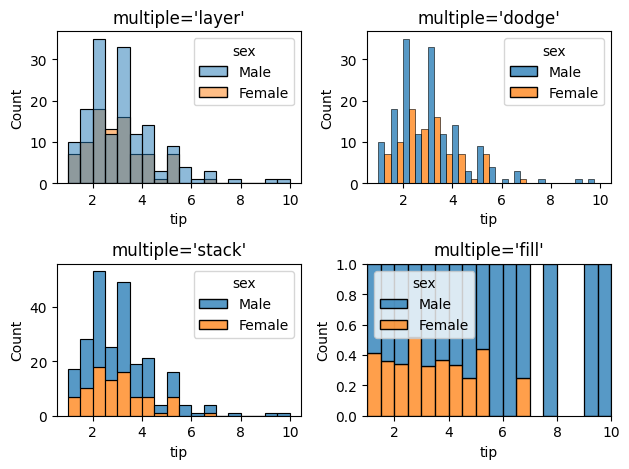

In [10]:
## histograma da variável "tip" separado por "sex"

plt.subplot(2, 2, 1)
sns.histplot(data=df, x="tip", hue="sex", multiple='layer', alpha=0.5)
plt.title("multiple='layer'")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="tip", hue="sex", multiple='dodge')
plt.title("multiple='dodge'")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="tip", hue="sex", multiple='stack')
plt.title("multiple='stack'")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="tip", hue="sex", multiple='fill')
plt.title("multiple='fill'")

# Ajustando o layout
plt.tight_layout() ## evita que as figuras fiquem sobrepostas

# Exibindo os gráficos
plt.show()

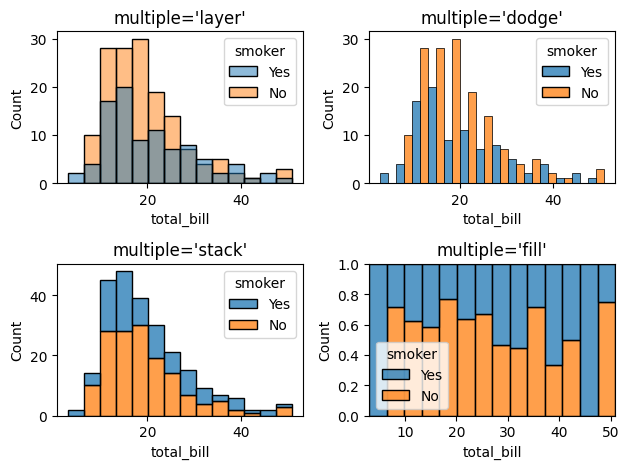

In [11]:
## histograma da variável "total_bill" separado por "smoker"

plt.subplot(2, 2, 1)
sns.histplot(data=df, x="total_bill", hue="smoker", multiple='layer', alpha=0.5)
plt.title("multiple='layer'")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="total_bill", hue="smoker", multiple='dodge')
plt.title("multiple='dodge'")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="total_bill", hue="smoker", multiple='stack')
plt.title("multiple='stack'")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="total_bill", hue="smoker", multiple='fill')
plt.title("multiple='fill'")

# Ajustando o layout
plt.tight_layout() ## evita que as figuras fiquem sobrepostas

# Exibindo os gráficos
plt.show()

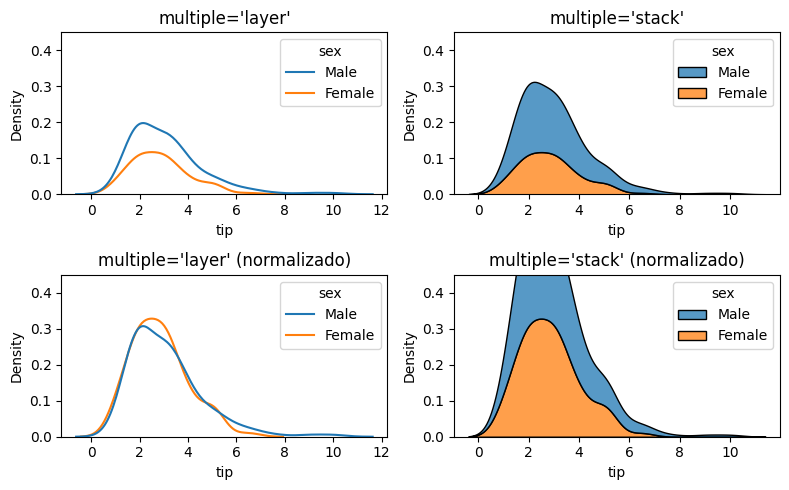

In [12]:
# Densidades aproximadas da variável "tip" separado por "sex"

plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x="tip", hue="sex", multiple='layer')
plt.ylim(0, 0.45)
plt.title("multiple='layer'")

plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x="tip", hue="sex", multiple='stack')
plt.ylim(0, 0.45)
plt.title("multiple='stack'")

plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x="tip", hue="sex", multiple='layer', common_norm=False)
plt.ylim(0, 0.45)
plt.title("multiple='layer' (normalizado)")

plt.subplot(2, 2, 4)
sns.kdeplot(data=df, x="tip", hue="sex", multiple='stack', common_norm=False)
plt.ylim(0, 0.45)
plt.title("multiple='stack' (normalizado)")

# Ajustando o layout
plt.tight_layout() ## evita que as figuras fiquem sobrepostas

# Exibindo os gráficos
plt.show()

In [ ]:
# Histograma com densidade sobreposta

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="total_bill", stat="density", kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="total_bill", hue="sex", stat="density", kde=True, common_norm=False)

plt.tight_layout()
plt.show()

---
## Gráfico Boxplot

Visualizar médias de variáveis categóricas.
```python
sns.boxplot(data, x, y, hue)
```

Veja os exemplos:

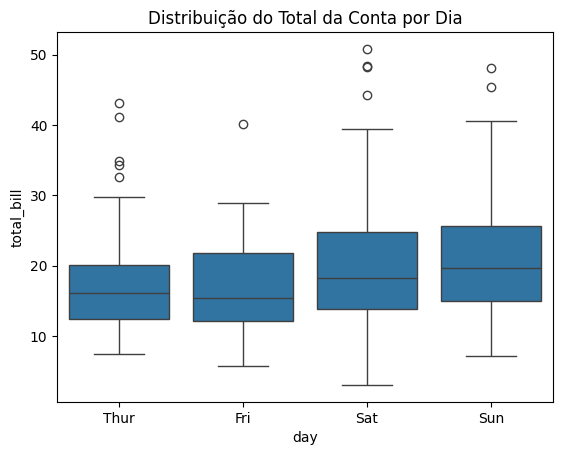

In [13]:
sns.boxplot(data=df, x="day", y="total_bill")
plt.title("Distribuição do Total da Conta por Dia")
plt.show()

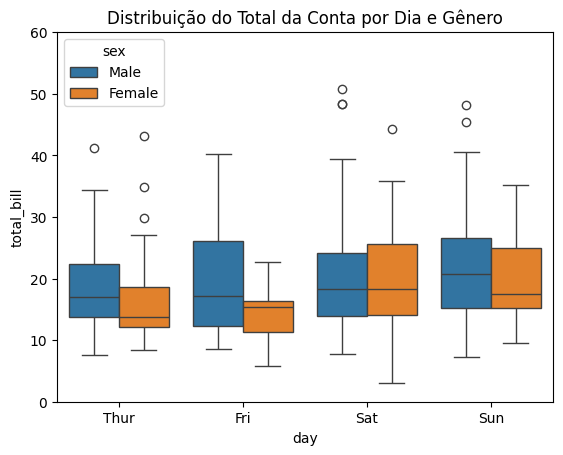

In [14]:
## seprando pela variável "sex"
sns.boxplot(data=df, x="day", y="total_bill", hue="sex")
plt.title("Distribuição do Total da Conta por Dia e Gênero")
plt.ylim(0, 60)
plt.show()

---
## Gráfico Heatmap

Para matrizes e correlações.
```python
sns.heatmap(matriz, annot=True, cmap="coolwarm", fmt=".2f")
```

Personalizações:

* `annot`: Exibe valores no mapa.
* `cmap`: Escolhe a paleta de cores. Veja as opções em https://seaborn.pydata.org/tutorial/color_palettes.html.


Veja o exemplo:

   total_bill   tip  size  sex_Male  sex_Female  smoker_Yes  smoker_No  \
0       16.99  1.01     2     False        True       False       True   
1       10.34  1.66     3      True       False       False       True   
2       21.01  3.50     3      True       False       False       True   
3       23.68  3.31     2      True       False       False       True   
4       24.59  3.61     4     False        True       False       True   

   day_Thur  day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
0     False    False    False     True       False         True  
1     False    False    False     True       False         True  
2     False    False    False     True       False         True  
3     False    False    False     True       False         True  
4     False    False    False     True       False         True  


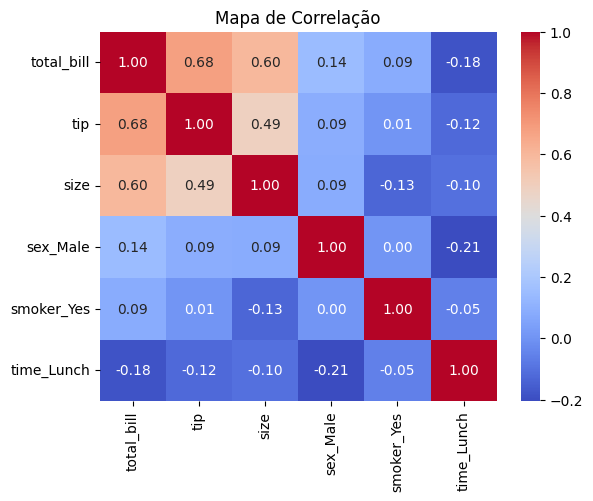

In [35]:
import pandas as pd

df_dummies = pd.get_dummies(df)
print( df_dummies.head() )

# Calculando a correlação
corr = df_dummies[["total_bill", "tip", "size", "sex_Male",
                   "smoker_Yes", "time_Lunch"]].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

---

## FacetGrid

Seaborn possui algumas funções que utilizam **FacetGrid** internamente, o que significa que são projetadas para criar gráficos com suporte embutido para facetas (subgráficos automáticos baseados em categorias ou colunas).

* Essas funções não podem ser combinadas com algumas funções da `matplotlib`, como a `subplot()` e `figure()`, uma vez que elas já possuem essas funcionalidades internamente.

Além dos argumentos tradicionais da Seaborn, teremos aqui alguns argumentos adicionais:

* `col`: Subplots em colunas
* `row`: Subplots em linhas
* `height`: altura em polegadas.
* `aspect`: proporção de cada faceta, de modo que `aspect * height` fornece a largura de cada faceta em polegadas.


---
### Gráfico de relação

A função `seaborn.relplot` é uma ferramenta versátil no Seaborn para criar gráficos de relações (relationship plots). Ela funciona como uma interface de alto nível para `scatterplot` (gráficos de dispersão) e `lineplot` (gráficos de linha), permitindo a criação de gráficos mais complexos, organizados por diferentes categorias ou níveis de agrupamento.

```python
seaborn.relplot(data, x ,y , hue, size, style, col, row, height, aspect,
                kind   ## tipo de gráfico ("scatter" ou "line"):
                )
```

Veja os exemplos:

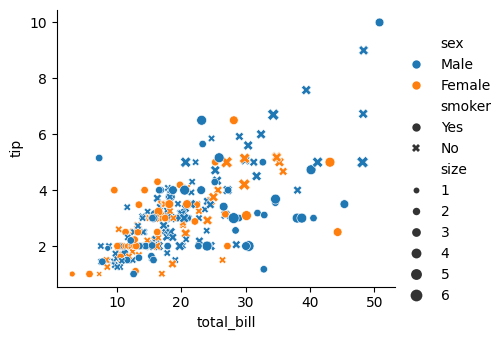

In [16]:
# Gráfico de dispersão simples
sns.relplot(data=df, x="total_bill", y="tip", hue="sex", style="smoker",
            size="size", height=3.5, aspect=1.2)
plt.show()

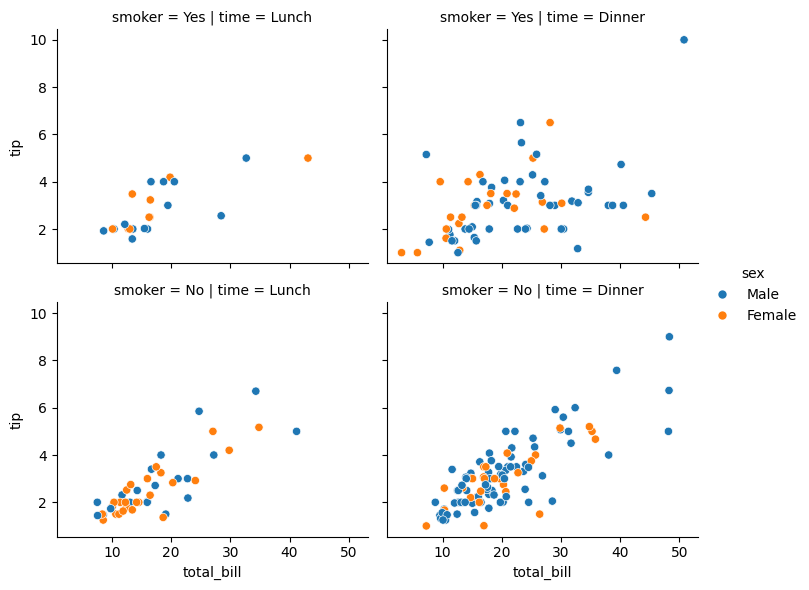

In [17]:
# Gráfico de dispersão com subplots por tempo e dia
sns.relplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="sex",
    col="time",       ## separa em colunas pela variável "time"
    row="smoker",     ## separa em linhas pela variável "smoker"
    kind="scatter",   ## tipo de gráfico
    height=3, aspect=1.2
)
plt.show()


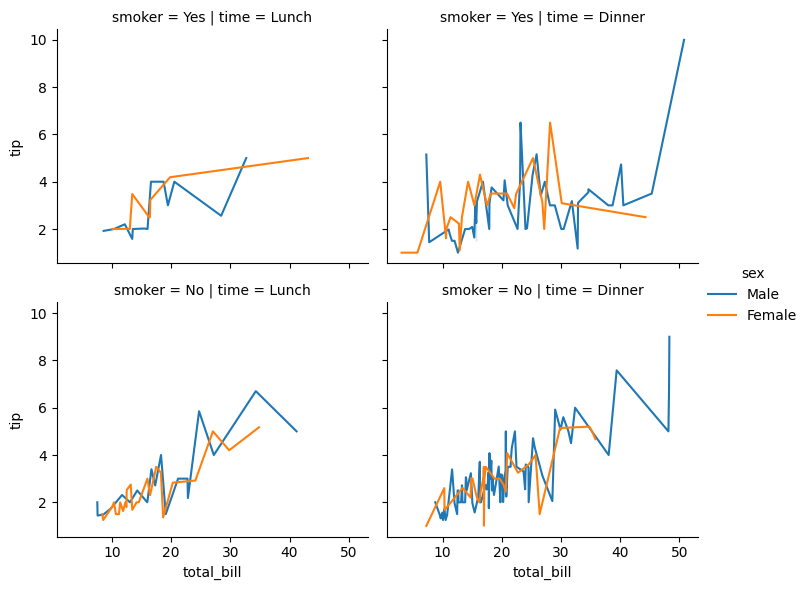

In [18]:
# Gráfico de dispersão com subplots por tempo e dia (com linhas)
sns.relplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="sex",
    col="time",      ## separa em colunas pela variável "time"
    row="smoker",    ## separa em linhas pela variável "smoker"
    kind="line",   ## tipo de gráfico
    height=3, aspect=1.2
)
plt.show()

---
### Gráfico de dispersão com regressão ajustada
Não raramente, pode ser interessante incluir uma reta de regressão linear para descrever o comportamento dos dados representados no gráfico de dispersão, para isto, temos a função:
```python
sns.lmplot(data, x, y, hue, style, size, height, aspect)
```

Veja os exemplos:

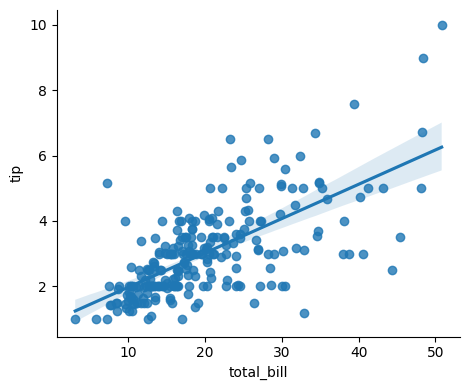

In [19]:
## lmplot() inclui a reta de regressão juntamente com uma banda representando incerteza.

sns.lmplot(data=df, x="total_bill", y="tip", height=4, aspect=1.2)

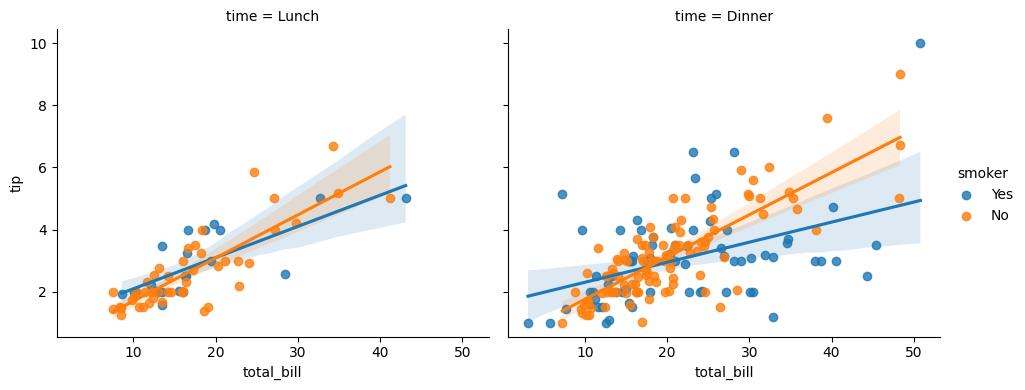

In [20]:
## separando agora em colunas pela variável "time" e em cores pela "smoker"

sns.lmplot(data=df, x="total_bill", y="tip",
           col="time",       ## colunas por "time"
           hue="smoker",     ## cores por "smoker"
           height=4, aspect=1.2)

     total_bill   tip smoker   day    time  size  sex_Male  sex_Female
0         16.99  1.01     No   Sun  Dinner     2     False        True
1         10.34  1.66     No   Sun  Dinner     3      True       False
2         21.01  3.50     No   Sun  Dinner     3      True       False
3         23.68  3.31     No   Sun  Dinner     2      True       False
4         24.59  3.61     No   Sun  Dinner     4     False        True
..          ...   ...    ...   ...     ...   ...       ...         ...
239       29.03  5.92     No   Sat  Dinner     3      True       False
240       27.18  2.00    Yes   Sat  Dinner     2     False        True
241       22.67  2.00    Yes   Sat  Dinner     2      True       False
242       17.82  1.75     No   Sat  Dinner     2      True       False
243       18.78  3.00     No  Thur  Dinner     2     False        True

[244 rows x 8 columns]


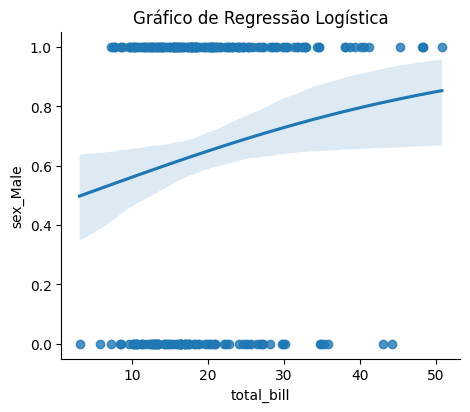

In [21]:
## Também podemos construir gráficos de modelos logisticos.

## Exemplo: sex ~ total_bill

new_df = pd.get_dummies(df, columns=["sex"])

print(new_df)

sns.lmplot(data=new_df, x="total_bill", y="sex_Male",
           logistic=True,    ## gráfico de regressão logística
           height=4, aspect=1.2)
plt.title("Gráfico de Regressão Logística")
plt.show()

---
### Gráfico da distribuição

A função `sns.displot()` do Seaborn é uma ferramenta versátil para visualização de distribuições univariadas ou bivariadas.
```python
sns.displot(data, x, y, col, row, hue, kind="hist", bins)
```
em que,
* `kind`: define o tipo do gráfico

  * `hist`(padrão): cria um histograma. Pode ser combinado com `kde=True` para incluir um densidade ajustada.
  * `kde`: cria um gráfico de densidade kernel (KDE).
  * `ecdf`: cria um gráfico da distribuição acumulada.

* `bins`: número de bins (ou intervalo) para o histograma.

Veja os exemplos:


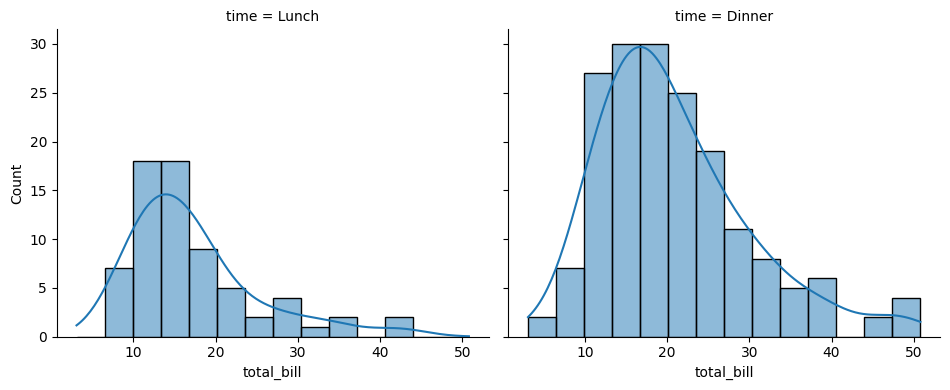

In [22]:
## histogramas "total_bill" separados por "time" e com densidade ajustada.
sns.displot(data=df, x="total_bill", col="time", kind="hist", kde=True, height=4, aspect=1.2)
plt.show()

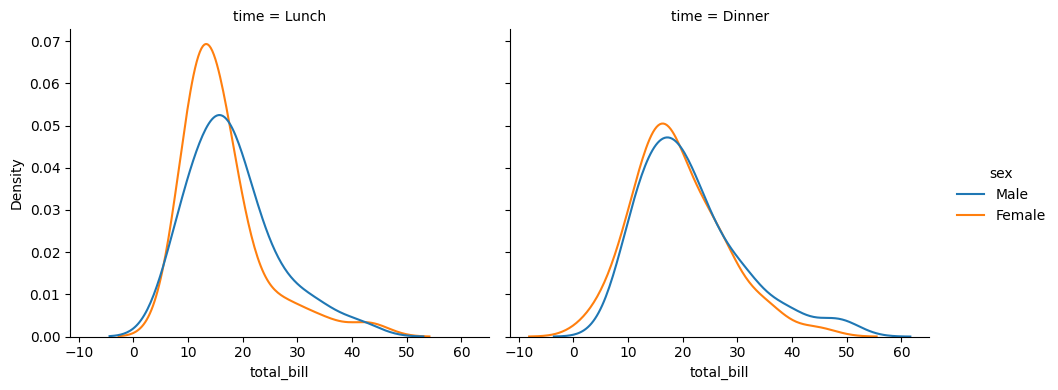

In [23]:
## kernel das densidades de "total_bill" de acordo com "sex" e separados em colunas por "time"
sns.displot(data=df, x="total_bill", col="time", kind="kde", hue="sex",
            common_norm=False, ## para normalizar cada conjunto de "hue" separadamente.
            height=4, aspect=1.2
            )
plt.show()

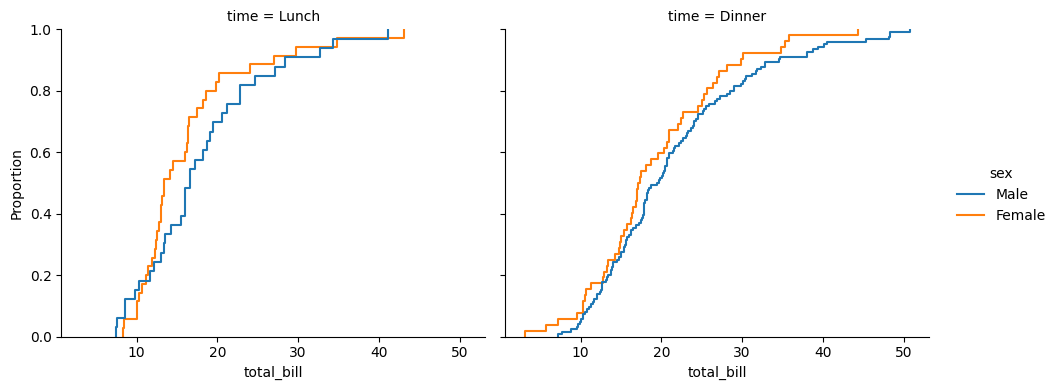

In [24]:
## distribuição acumulada de "total_bill" de acordo com "sex" e separados em colunas por "time"
sns.displot(data=df, x="total_bill", col="time", kind="ecdf", hue="sex",
            height=4, aspect=1.2)
plt.show()

---
## Visualizações multiplas

Algumas funções seaborn combinam vários tipos de gráficos para fornecer rapidamente resumos informativos de um conjunto de dados.

* `jointplot()` é usado para criar uma visualização combinada de duas variáveis, exibindo:

  * A relação entre as variáveis no gráfico principal (como scatter, kde, ou histograma).
  * Distribuições marginais de cada variável nos eixos x e y.

  ```python
  sns.jointplot(data, x, y, kind="scatter", hue, height)
  ```
  em que:

  * `kind`: define o tipo de gráfico principal para exibir a relação entre as variáveis, com as seguintes opções:
    * `'scatter'` (padrão): Gráfico de dispersão.
    * `'kde'`: Densidade kernel bidimensional.
    * `'hist'`: Histogramas bidimensionais.
    * `'reg'`: Regressão linear (com linha de ajuste). Não  pode ser utilizado em conjunto com `hue`.


* `pairplot()`, tem uma visão mais ampla: ele mostra distribuições conjuntas e marginais para todos os relacionamentos em pares e para cada variável, respectivamente:

  ```python
  sns.pairplot(data, hue, kind='scatter', diag_kind='auto', palette, height)
  ```
  em que:
  * `kind`: define o tipo de gráfico principal, com as seguintes opções:
    * `'scatter'` (padrão): gráfico de dispersão.
    * `'kde'`: gráfico de densidade.
  * diag_kind: Tipo de gráfico para a diagonal:
    * `'auto'` (padrão): Escolha automática.
    * `'hist'`: Histogramas.
    * `'kde'`: Densidade kernel univariada.


> Para contralar o tamanho essas funções possuem apenas o argumento `height`. Cada faceta sempre será quadrada (height x height).    

Veja os exemplos:


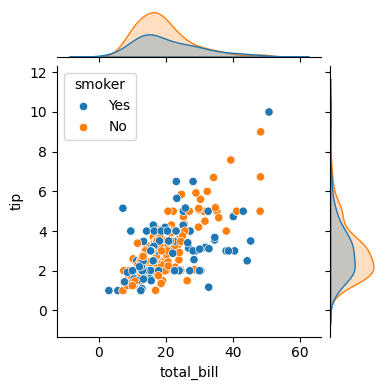

In [25]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="scatter", hue="smoker",
            height=4)
plt.show()

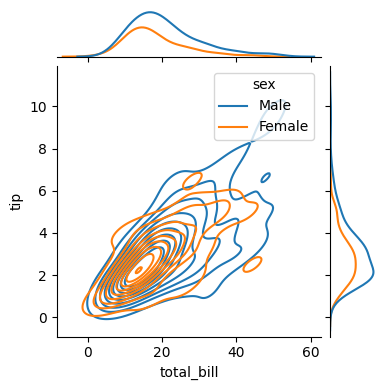

In [26]:
# Gráfico de densidade KDE bidimensional
sns.jointplot(data=df, x="total_bill", y="tip", kind="kde", hue="sex", height=4)
plt.show()

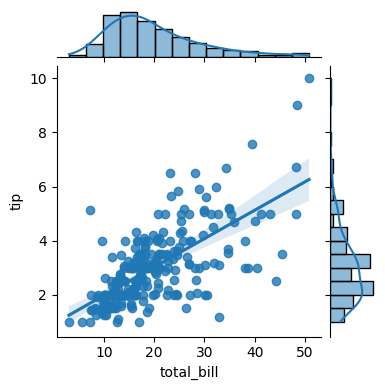

In [27]:
# Gráfico de dispersão com regressão linear
sns.jointplot(data=df, x="total_bill", y="tip", kind="reg", height=4)
plt.show()

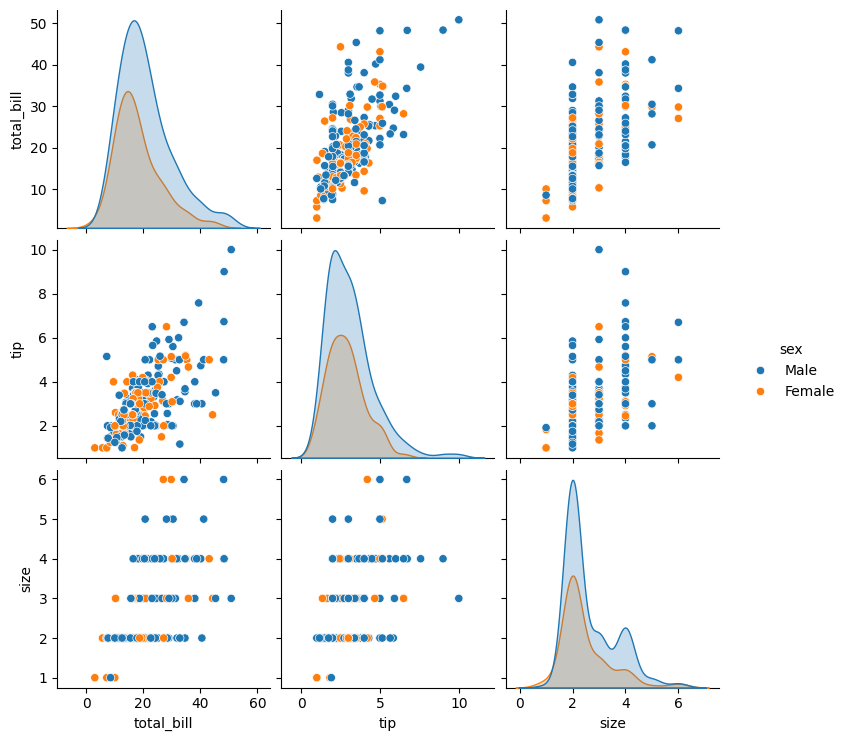

In [28]:
# Matriz de gráficos com diferenciação por sexo
sns.pairplot(data=df, hue="sex", height=2.5)
plt.show()

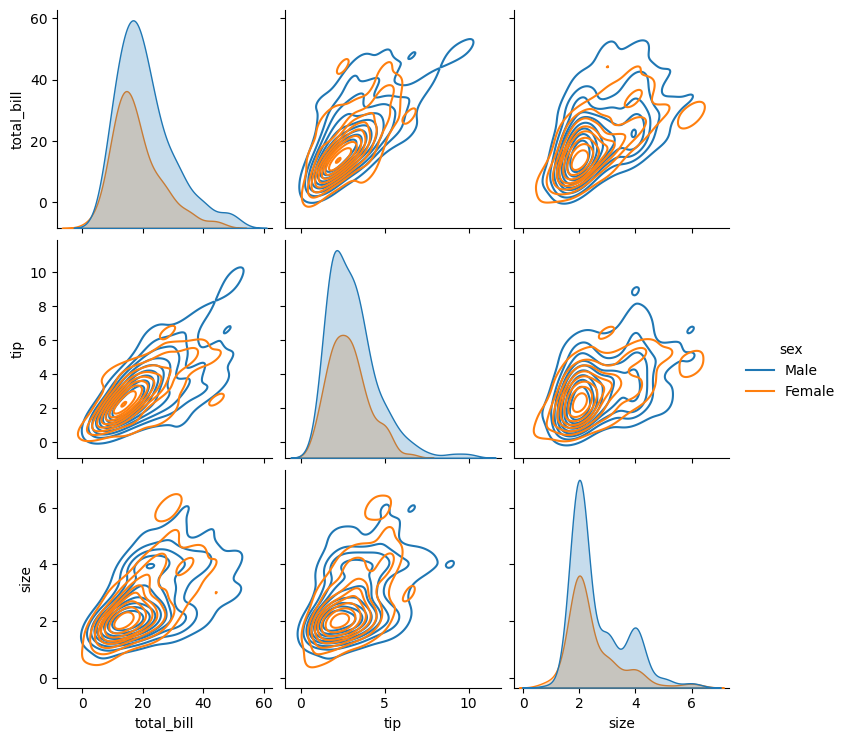

In [29]:
# Usando KDE como gráfico principal e na diagonal
sns.pairplot(data=df, hue="sex", kind="kde", diag_kind="kde", height=2.5)
plt.show()

## Exercícios

Os exercícios a seguir devem ser feitos utilizando o banco de dados `penguins` da biblioteca `Seaborn`. Veja o código abaixo:


In [38]:
import seaborn as sns

# Carregar o dataset
penguins = sns.load_dataset("penguins")

# Exibir uma amostra do dataset
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


Descrição das variáveis:

* `"species"`:	Espécie do pinguim (Adelie, Chinstrap, Gentoo).
* `"island"`:	Ilha onde o pinguim foi observado.
* `"bill_length_mm"`:	Comprimento do bico em milímetros.
* `"bill_depth_mm"`:	Profundidade do bico em milímetros.
* `"flipper_length_mm"`:	Comprimento da nadadeira em milímetros.
* `"body_mass_g"`:	Massa corporal em gramas.
* `"sex"`:	Sexo do pinguim (masculino ou feminino).

**Exercício 1**: Gere um boxplot para comparar a distribuição do comprimento do bico (bill_length_mm) entre as diferentes espécies. Diferencie por sexo usando o argumento `hue`.

**Exercício 2**: Crie uma matriz de correlação entre as variáveis numéricas do dataset e visualize-a como um heatmap. Adicione rótulos para facilitar a interpretação.

**Exercício 3**: Faça um gráfico de dispersão com regressão linear ajustada para analisar a relação entre o comprimento do bico (bill_length_mm) e o comprimento da nadadeira (flipper_length_mm). Diferencie os pontos por espécie usando  `hue`.

**Exercício 4**: Crie um gráfico com `sns.jointplot()` para examinar a relação entre o comprimento do bico (bill_length_mm) e a massa corporal (body_mass_g), com marginais que mostrem as distribuições dessas variáveis.

**Exercício 5**: Utilize o `sns.pairplot()` para explorar todas as combinações possíveis das variáveis numéricas do dataset. Diferencie os gráficos por espécie usando o argumento  `hue`.


<Axes: xlabel='species', ylabel='bill_length_mm'>

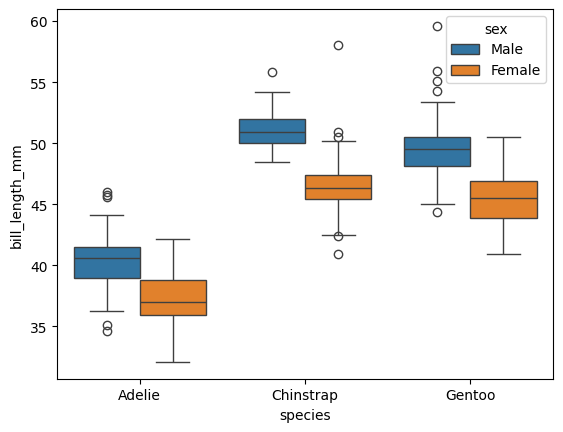

In [31]:
#Exercício 1
sns.boxplot(data=penguins, x="species", y="bill_length_mm", hue="sex")

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
3             NaN            NaN                NaN          NaN   
4            36.7           19.3              193.0       3450.0   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0            True              False           False          False   
1            True              False           False          False   
2            True              False           False          False   
3            True              False           False          False   
4            True              False           False          False   

   island_Dream  island_Torgersen  sex_Female  sex_Male  
0         False              True       False      True  
1         False              True        True   

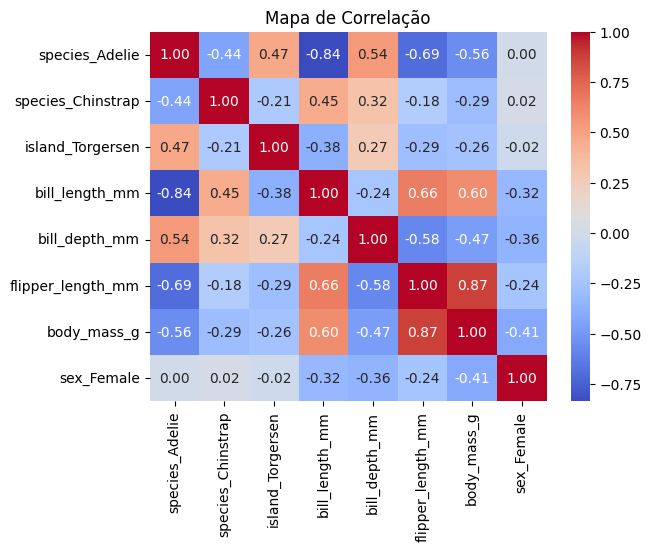

In [44]:
#Exercício 2
df_dummies = pd.get_dummies(penguins)
print( df_dummies.head() )

# Calculando a correlação
corr = df_dummies[["species_Adelie","species_Chinstrap","island_Torgersen","bill_length_mm", "bill_depth_mm", "flipper_length_mm" , "body_mass_g", "sex_Female",  ]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

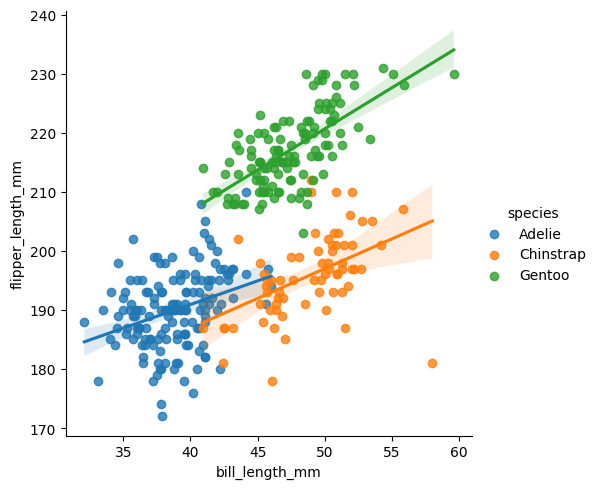

In [48]:
#Exercício 3
sns.lmplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species")



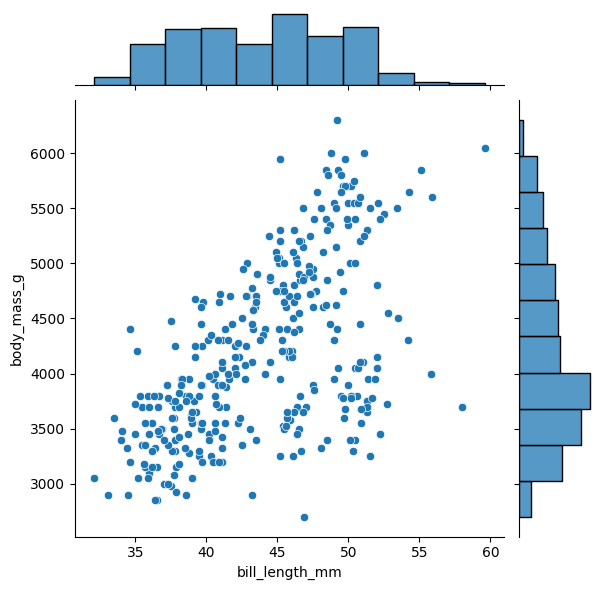

In [50]:
#Exercício 4
#Exercício 4: Crie um gráfico com sns.jointplot() para examinar a relação entre o comprimento do bico (bill_length_mm) e a massa corporal (body_mass_g), com marginais que mostrem as distribuições dessas variáveis.
sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g")

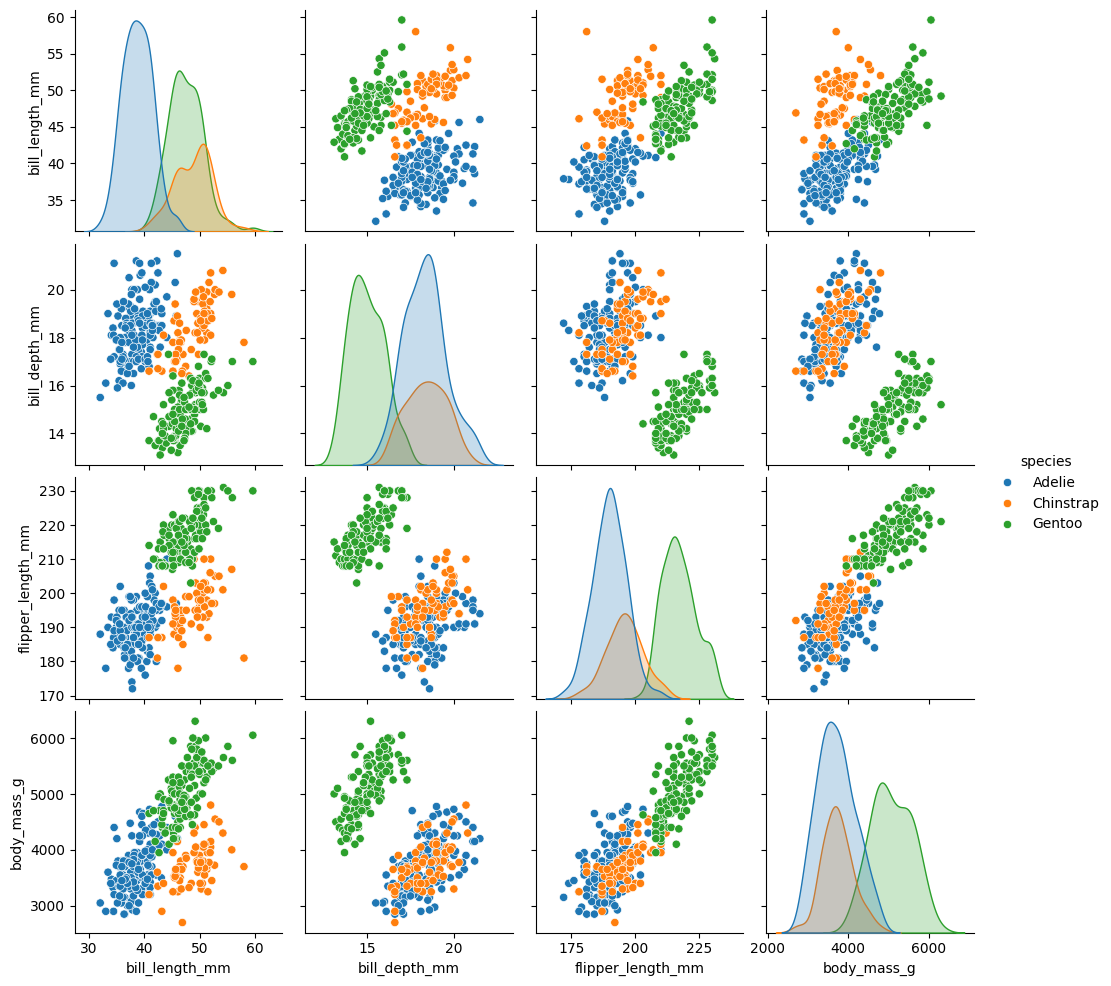

In [54]:
#Exercício 5
#Utilize o sns.pairplot() para explorar todas as combinações possíveis das variáveis numéricas do dataset. Diferencie os gráficos por espécie usando o argumento hue.
sns.pairplot(data=penguins, hue="species", kind='scatter', diag_kind='auto' )
